In [1]:
import psycopg2
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Connecting to database 

In [2]:
conn = psycopg2.connect(
    host = '165.22.22.202' ,
    database = 'gsmarena' ,
    user = 'anomaly' ,
    password = 'Hitman.agent47'    
)

### WEIGHT ~ DISPLAYSIZE

#### Fetching required tables from database 

In [3]:
cur = conn.cursor()
cur.execute(''' SELECT "DisplaySize" , "Weight"
                FROM devices ;''')

rows = cur.fetchall()
col_names = [desc[0] for desc in cur.description]

weight_display = pd.DataFrame(rows, columns=col_names)

In [4]:
weight_display

,DisplaySize,Weight
0,6.55,158.0
1,6.67,203.0
2,6.67,204.0
3,6.67,207.0
4,6.28,179.0
...,...,...
12963,5.50,160.0
12964,5.00,143.0
12965,5.20,192.0
12966,5.50,165.0


#### Display Class

In [5]:
def display_class(x) :
    if x >= 7 :
        return 'LARGE'
    return 'SMALL'

In [6]:
weight_display['DisplayClass'] = weight_display['DisplaySize'].apply(display_class)

#### Checking for normalization 

/Applications/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

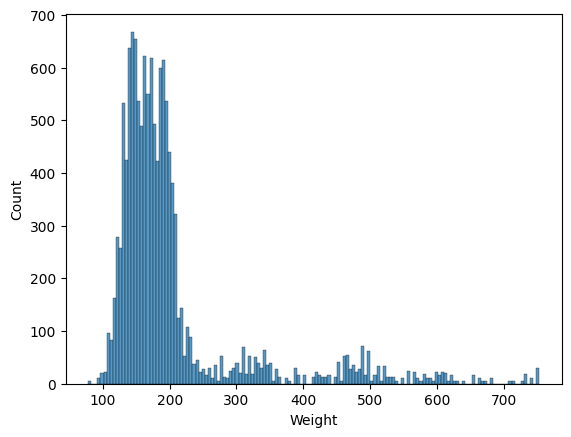

In [7]:
sns.histplot(weight_display['Weight'])

In [8]:
from scipy.stats import normaltest

In [9]:
stat_dagostino, p_value_dagostino = normaltest(weight_display['Weight'])
print(f"D'Agostino-Pearson Test of : Statistics={stat_dagostino}, p-value={p_value_dagostino}")

D'Agostino-Pearson Test of : Statistics=6823.4587354242485, p-value=0.0


### U_Test

In [10]:
from scipy.stats import mannwhitneyu

In [11]:
small_display = weight_display[weight_display['DisplayClass'] == 'SMALL']['Weight']
big_display = weight_display[weight_display['DisplayClass'] == 'LARGE']['Weight']

In [12]:
u_statistic, p_value = mannwhitneyu(small_display, big_display )
p_value

0.0

In [13]:
u_statistic, p_value = mannwhitneyu(small_display, big_display , alternative='greater')
p_value

1.0

In [14]:
u_statistic, p_value = mannwhitneyu( big_display , small_display, alternative='greater')
p_value

0.0

In [15]:
from scipy.stats import yeojohnson , boxcox 

In [16]:
weight_display['Normal_Weight'] = yeojohnson(weight_display['Weight'])[0]

/Applications/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Normal_Weight', ylabel='Count'>

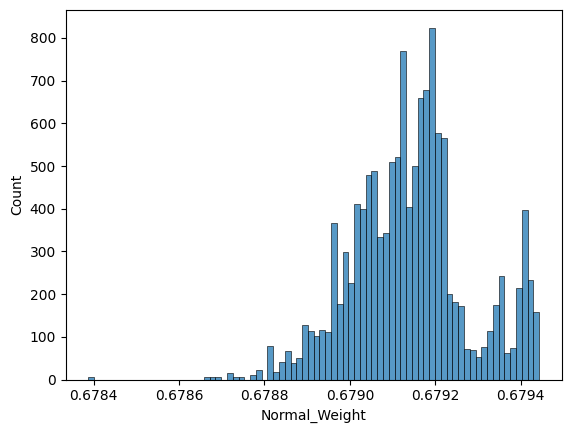

In [17]:
sns.histplot(weight_display['Normal_Weight'])

In [18]:
stat_dagostino, p_value_dagostino = normaltest(weight_display['Normal_Weight'])
print(f"D'Agostino-Pearson Test of : Statistics={stat_dagostino}, p-value={p_value_dagostino}")

D'Agostino-Pearson Test of : Statistics=52.06576839240871, p-value=4.9438131182002986e-12


In [19]:
weight_display['Normal_Weight'] = boxcox(weight_display['Weight'])[0]

/Applications/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Normal_Weight', ylabel='Count'>

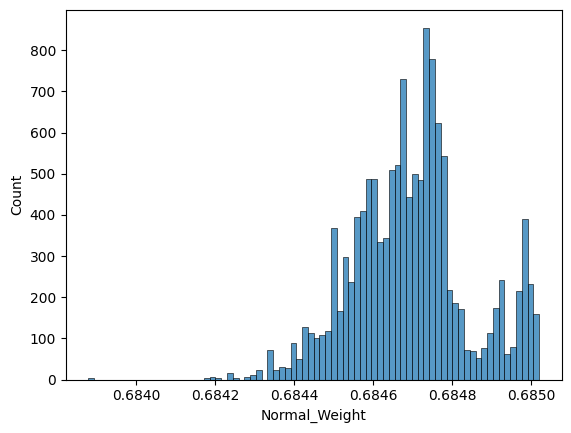

In [20]:
sns.histplot(weight_display['Normal_Weight'])

In [21]:
stat_dagostino, p_value_dagostino = normaltest(weight_display['Normal_Weight'])
print(f"D'Agostino-Pearson Test of : Statistics={stat_dagostino}, p-value={p_value_dagostino}")

D'Agostino-Pearson Test of : Statistics=53.26108175788319, p-value=2.719587561439573e-12
